In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### <데이터셋 개요>
- Survived: 생존여부
    - 0 = NO
    - 1 = Yes
- pclass: 티켓 등급
    - 1 = 1st
    - 2 = 2nd
    - 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Name
- Fare: 운임
- Cabin: 객실번호
- Embarked: 탑승 항구
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [20]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# 컬럼 이름 변경: 모두 소문자로(옵션)
data.columns=data.columns.str.lower()

In [26]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [14]:
data.shape

(891, 12)

### 결측치 확인
- 컬럼별 개수
- 데이터셋의 크기가 작은 경우는 결측치가 있는 레코드를 삭제하지 않는다
    - 대체하는 방식으로 전처리

In [16]:
# 컬럼별 결측치 확인
data.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [18]:
# 결측치 비율 확인
# series 간의 연산
data.isnull().sum()/data.shape[0]*100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

In [ ]:
# cabin 컬럼 결측치 => 대체하는 방법으로 전처리
# 77% 매우 높은 비율 => cabin 컬럼 자체를 삭제하는 것이 좋다


## 불필요한 변수 제거
- 본인이 생각했을 때 제거해도 될것 같은 컬럼명 : Ticket
- 제거해도 될 것 같은 이유 : 고유값은 이름과 passengerid로 충분하기 때문

### Cabin 데이터를 활용하여 유도변수 생성(유도변수란 원래의 데이터를 가공해서 의미있는 데이터 추출)
- 본인이 생각한 유도 변수: cabin의 첫 알파벳
- 해당 유도 변수를 사용해야 하는 이유: Fare와 양의 상관관계가 있어보임(사실 별루 없음)

In [30]:
# 값의 유무에 따라서 (값이 있다 1 , 값이 없다 0)
# EDA 확인 후 최종 결정
# 해볼 가능성이 있다.

In [ ]:
# 알파벳이나 숫자로 방의 위치를 알 수 있다.

- 개별 객실 번호는 의미가 없음
- cabin 데이터의 첫글자가 deck을 의미
- 유도변수: deck 컬럼 추가
- deck 종류: ABCDEFGT, unknown
- cabin 컬럼의 각 값에 적용한 처리
    - 1.
        - 값의 첫번째 문자가 deck list에 있으면 해당 deck을 반환
        - 없으면 unknown 반환
    - 2.
        - 첫번째 문자반환
        - 없으면 다른것 반환

In [ ]:
# nan 유지한 상태로 처리
# nan 유지
# 반복문 => 타입으로 확인 후 처리
# nan 변형
# 반복문 => str 변형 후 처리

In [95]:
def cabin_deck(x):
    if  type(x) == float:
        return 'Unknown'
    else:
        return x[0]

In [96]:
data['cabin'].apply(lambda x: cabin_deck(x))

0      Unknown
1            C
2      Unknown
3            C
4      Unknown
5      Unknown
6            E
7      Unknown
8      Unknown
9      Unknown
10           G
11           C
12     Unknown
13     Unknown
14     Unknown
15     Unknown
16     Unknown
17     Unknown
18     Unknown
19     Unknown
20     Unknown
21           D
22     Unknown
23           A
24     Unknown
25     Unknown
26     Unknown
27           C
28     Unknown
29     Unknown
        ...   
861    Unknown
862          D
863    Unknown
864    Unknown
865    Unknown
866    Unknown
867          A
868    Unknown
869    Unknown
870    Unknown
871          D
872          B
873    Unknown
874    Unknown
875    Unknown
876    Unknown
877    Unknown
878    Unknown
879          C
880    Unknown
881    Unknown
882    Unknown
883    Unknown
884    Unknown
885    Unknown
886    Unknown
887          B
888    Unknown
889          C
890    Unknown
Name: cabin, Length: 891, dtype: object

In [ ]:
# nan 변형
# 반복문 => str 변형 후 처리

In [99]:
def cabin_deck2(x):
    if x[0].islower() == True:
        return 'unknown'
    else:
        return x[0]

In [100]:
data['cabin'].apply(lambda x: cabin_deck2(str(x)))

0      unknown
1            C
2      unknown
3            C
4      unknown
5      unknown
6            E
7      unknown
8      unknown
9      unknown
10           G
11           C
12     unknown
13     unknown
14     unknown
15     unknown
16     unknown
17     unknown
18     unknown
19     unknown
20     unknown
21           D
22     unknown
23           A
24     unknown
25     unknown
26     unknown
27           C
28     unknown
29     unknown
        ...   
861    unknown
862          D
863    unknown
864    unknown
865    unknown
866    unknown
867          A
868    unknown
869    unknown
870    unknown
871          D
872          B
873    unknown
874    unknown
875    unknown
876    unknown
877    unknown
878    unknown
879          C
880    unknown
881    unknown
882    unknown
883    unknown
884    unknown
885    unknown
886    unknown
887          B
888    unknown
889          C
890    unknown
Name: cabin, Length: 891, dtype: object

In [86]:
# nan 제거 후 처리
# nan -> 0
# 반복문 : 0 -> unknown / 0이 아니면 첫번째 글자 인덱싱
# 결과 리스트를 새로운 컬럼으로 추가
sample=data.copy()

In [88]:
sample['cabin'].fillna(0,inplace=True)

In [89]:
deck_list=[]
for i in sample['cabin']:
    if i ==0:
        deck_list.append('unknown')
    else:
        deck_list.append(i[0])

In [91]:
sample['deck']=deck_list

In [92]:
sample.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,unknown


In [117]:
# 첫번째 알파벳만 추려서 고유값 구하기
tmp=set()
for i in data['cabin'].unique()[1:]:
    tmp.add(i[0])
tmp

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [118]:
tmp.add('unknown')

In [119]:
tmp=list(tmp)

In [120]:
tmp[-2]

'unknown'

In [121]:
def cabin_deck3(x):
    if str(x)[0] in tmp:
        return str(x)[0]
    else:
        return tmp[-2]

In [122]:
data['cabin'].apply(cabin_deck3,tmp=tmp)

TypeError: cabin_deck3() got an unexpected keyword argument 'tmp'

In [124]:
# 가장 효율적인 방법
# 시리즈에서 str 속성값 사용 => str 아닌 속성에는 적용되지 않고 넘어간다.
data['deck']=data['cabin'].str[0]

In [125]:
data['deck'].fillna('unknown',inplace=True)

In [126]:
data['deck']

0      unknown
1            C
2      unknown
3            C
4      unknown
5      unknown
6            E
7      unknown
8      unknown
9      unknown
10           G
11           C
12     unknown
13     unknown
14     unknown
15     unknown
16     unknown
17     unknown
18     unknown
19     unknown
20     unknown
21           D
22     unknown
23           A
24     unknown
25     unknown
26     unknown
27           C
28     unknown
29     unknown
        ...   
861    unknown
862          D
863    unknown
864    unknown
865    unknown
866    unknown
867          A
868    unknown
869    unknown
870    unknown
871          D
872          B
873    unknown
874    unknown
875    unknown
876    unknown
877    unknown
878    unknown
879          C
880    unknown
881    unknown
882    unknown
883    unknown
884    unknown
885    unknown
886    unknown
887          B
888    unknown
889          C
890    unknown
Name: deck, Length: 891, dtype: object

In [127]:
# data -> cabin 컬럼 삭제
data.drop('cabin',axis=1,inplace=True)

In [128]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'deck'],
      dtype='object')

## Name 데이터를 활용하여 유도변수 생성
- 개별 이름은 모델 예측에 유의미한 변수가 아니다
- 대표 특성을 찾을 수 있는 범주 데이터를 추출할 수 있다
- Mr , Ms , Miss, Master ...
- 추출하여 title 컬럼으로 추가
- 첫번째 방법: split() 두번 사용하여 처리
- 두번째 방법: 정규식을 사용하여 처리
    - 정규식 패턴:
        - [a-zA-Z]

In [138]:
# split 두번하는 방법
name=data['name'].apply(lambda x: x.split(',')[1])

In [146]:
# 한줄 코드
# data['name'].apply(lambda x: x.split(',')[1].split('.')[0])

In [139]:
name.head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: name, dtype: object

In [141]:
data['title']=name.apply(lambda x: x.split('.')[0])

In [142]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,deck,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,unknown,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,unknown,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,unknown,Mr


In [143]:
data['title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [145]:
# 정규식 표현 방법
import re

In [152]:
# Sir|Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master
def get_title(x):
    pattern=re.compile('Sir|Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master',re.I)
    result=pattern.search(x)
    if result:
        return result.group()
    else:
        return str(np.nan)

In [153]:
data['name'].apply(get_title)

0          Mr
1          Mr
2        Miss
3          Mr
4          Mr
5          Mr
6          Mr
7      Master
8          Mr
9          Mr
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15         Mr
16     Master
17         ms
18         Mr
19         Mr
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25         Mr
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862        Mr
863      Miss
864        Mr
865        Mr
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871        Mr
872        Mr
873        Mr
874        Mr
875      Miss
876        Mr
877        Mr
878        Mr
879        Mr
880        Mr
881        Mr
882      Miss
883        Mr
884        Mr
885        Mr
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: name, Length: 891, dtype: object

In [156]:
# . =>  \.
# ([a-zA-Z]+)
# ([a-zA-Z]+)\.
data['title']=data['name'].str.extract('([a-zA-Z]+)\.',expand=False).str.lower()

In [157]:
data['title'].isnull().sum()

0

In [158]:
data['name'].value_counts()

Ostby, Mr. Engelhart Cornelius                                         1
Petranec, Miss. Matilda                                                1
Mellors, Mr. William John                                              1
Hendekovic, Mr. Ignjac                                                 1
Otter, Mr. Richard                                                     1
Saundercock, Mr. William Henry                                         1
Hickman, Mr. Leonard Mark                                              1
Astor, Mrs. John Jacob (Madeleine Talmadge Force)                      1
Maisner, Mr. Simon                                                     1
Williams, Mr. Charles Duane                                            1
Kilgannon, Mr. Thomas J                                                1
Davison, Mrs. Thomas Henry (Mary E Finck)                              1
Sjostedt, Mr. Ernst Adolf                                              1
Rintamaki, Mr. Matti                               

In [159]:
data['title'].value_counts()

mr          517
miss        182
mrs         125
master       40
dr            7
rev           6
col           2
major         2
mlle          2
sir           1
capt          1
countess      1
ms            1
jonkheer      1
lady          1
mme           1
don           1
Name: title, dtype: int64

#### 범주 재설정
- officer : capt,col,major,dr,rev,sir
- royalty : jonkheer, countess, dona , lady, don
- mr : mr
- mrs : mme, ms ,mrs
- miss : miss, mlle
- master : master

In [174]:
# 범주 매핑
# key: old, value:new
title_map={ 'capt':'officer',
           'col':'officer'
           ,'major':'officer'
           ,'dr':'officer'
           ,'rev':'officer'
           ,'sir':'officer',
           'jonkheer': 'royalty',
          'countess':'royalty',
          'dona': 'royalty',
          'lady': 'royalty',
          'don': 'royalty',
          'mr': 'mr',
          'mrs':'mrs',
          'ms':'mrs',
          'mme':'mrs',
          'miss':'miss',
          'mlle':'miss',
          'master':'master'}

In [177]:
data['title2']=data['title'].map(title_map)

In [178]:
data['title2'].head()

0      mr
1     mrs
2    miss
3     mrs
4      mr
Name: title2, dtype: object

### 결측치 처리 - Age
- 결측치를 대체할 값을 어떻게 구할까?
- 미성년자: Master,Miss

In [ ]:
# 같은 title 범주의 age 평균값으로 결측치 대체

In [195]:
data.groupby('title')['age'].mean()

{'capt': 70.0,
 'col': 58.0,
 'countess': 33.0,
 'don': 40.0,
 'dr': 42.0,
 'jonkheer': 38.0,
 'lady': 48.0,
 'major': 48.5,
 'master': 4.574166666666667,
 'miss': 21.773972602739725,
 'mlle': 24.0,
 'mme': 24.0,
 'mr': 32.368090452261306,
 'mrs': 35.898148148148145,
 'ms': 28.0,
 'rev': 43.166666666666664,
 'sir': 49.0}

In [194]:
data[['title','age']]

,title,age
0,mr,22.0
1,mrs,38.0
2,miss,26.0
3,mrs,35.0
4,mr,35.0
5,mr,NaN
6,mr,54.0
7,master,2.0
8,mrs,27.0
9,mrs,14.0


In [208]:
data['age2']=data['age'].fillna(data.groupby('title')['age'].transform('mean'))

In [209]:
data[['title','age2']]

,title,age2
0,mr,22.000000
1,mrs,38.000000
2,miss,26.000000
3,mrs,35.000000
4,mr,35.000000
5,mr,32.368090
6,mr,54.000000
7,master,2.000000
8,mrs,27.000000
9,mrs,14.000000


In [211]:
data['age2'].isnull().sum()

0

#### age 데이터를 범주형 데이터로 변경
- 구간
    - 0~20
    - 20~40
    - 40~60
    - 60~

In [213]:
data['age2'].describe()

count    891.000000
mean      29.754659
std       13.277179
min        0.420000
25%       21.773973
50%       30.000000
75%       35.898148
max       80.000000
Name: age2, dtype: float64

In [216]:
data['age2']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      32.368090
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     32.368090
18     31.000000
19     35.898148
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     32.368090
27     19.000000
28     21.773973
29     32.368090
         ...    
861    21.000000
862    48.000000
863    21.773973
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    32.368090
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    32.368090
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    21.7739

In [254]:
data['age_range']=pd.cut(data['age2'],[0,20,40,60,100],labels=['under20','under40','under60','over60'])   

In [255]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,deck,title,title2,age2,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,unknown,mr,mr,22.0,under40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,mrs,mrs,38.0,under40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,unknown,miss,miss,26.0,under40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,mrs,mrs,35.0,under40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,unknown,mr,mr,35.0,under40


In [229]:
# digitize 사용
data['age_range']=np.digitize(data['age2'],[20,40,60])

In [238]:
t=list(data['age_range'].unique())
t.sort()

In [239]:
t

[0, 1, 2, 3]

In [246]:
range_map={}
for k,v in zip(t,['under20','under40','under60','over60']):
    range_map[k]=v

In [251]:
range_map

{0: 'under20', 1: 'under40', 2: 'under60', 3: 'over60'}

In [252]:
data['age_range']=data['age_range'].map(range_map)

In [321]:
data['age_range'].value_counts()

under40    557
under20    183
under60    129
over60      22
Name: age_range, dtype: int64

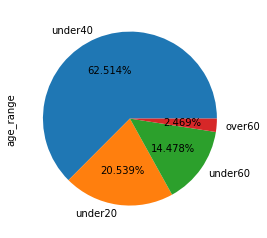

In [295]:
# 전체 연령대 비율
# pie chart
data['age_range'].value_counts().plot(kind='pie',autopct='%.3f%%')

In [304]:
# 생존여부별 나이대별 생존 비율
# stacked bar chart

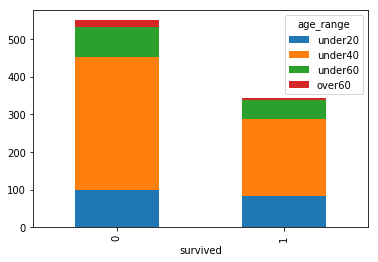

In [308]:
# 원본 데이터를 조작해서 시각화
tmp=data.pivot_table(index='survived',columns='age_range',aggfunc='count')['age2']
tmp.plot(kind='bar',stacked=True)

In [312]:
# 시각화용 데이터를 생성
dead=data[data['survived']==0]['age_range'].value_counts()
survived=data[data['survived']==1]['age_range'].value_counts()

In [314]:
dead.name='dead'
survived.name='survived'

In [315]:
df=pd.DataFrame([dead,survived])
df

,under40,under20,under60,over60
dead,354,99,79,17
survived,203,84,50,5


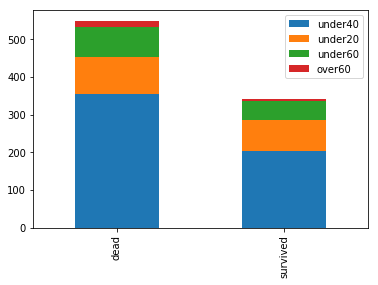

In [316]:
df.plot(kind='bar',stacked=True)

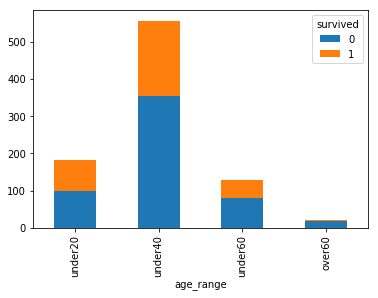

In [320]:
# 연령대별 생존 비율
# stacked bar chart
tmp=data.pivot_table(index='age_range',columns='survived',aggfunc='count')['age2']
tmp.plot(kind='bar',stacked=True)

### 기존 변수를 활용하여 family_size 유도 변수 추가

#### family_size 데이터를 범주형으로 변경

- 3 미만
- 3 이상 7 미만
- 7 이상

In [323]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'deck', 'title', 'title2',
       'age2', 'age_range'],
      dtype='object')

In [345]:
data['family_size']=data['sibsp']+data['parch']+1  # 자기 자신 포함

In [346]:
data['family_size']=np.digitize(data['family_size'],[3,7])

In [347]:
t=data['family_size'].unique()
t

array([0, 1, 2], dtype=int64)

In [348]:
tmp={}
for k,v in zip(t,['small','medium','large']):
    tmp[k]=v
    

In [349]:
tmp

{0: 'small', 1: 'medium', 2: 'large'}

In [350]:
data['family_size']=data['family_size'].map(tmp)

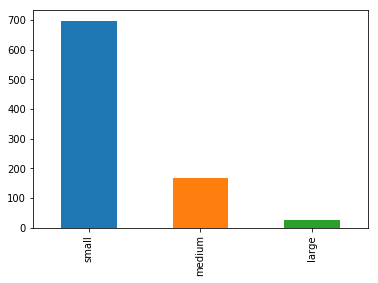

In [357]:
data['family_size'].value_counts().plot(kind='bar')

In [359]:
data['family_size_count']=data['sibsp']+data['parch']+1

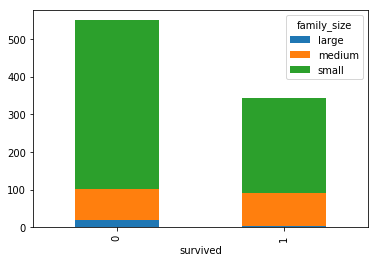

In [364]:
# 생존여부에 따라 가족크기별 비율
data.pivot_table(index='survived',columns='family_size',aggfunc='count')['family_size_count'].plot(kind='bar',stacked=True)

In [367]:
survived=data[data['survived']==1]['family_size'].value_counts()
dead=data[data['survived']==0]['family_size'].value_counts()

In [368]:
df=pd.DataFrame([survived,dead])
df.index=['survived','dead']
df

,small,medium,large
survived,252,86,4
dead,446,82,21


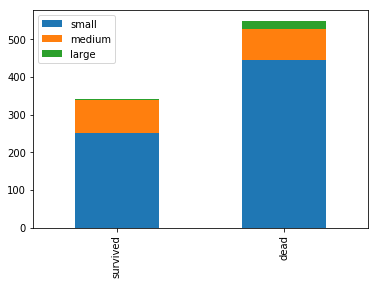

In [369]:
df.plot(kind='bar',stacked=True)

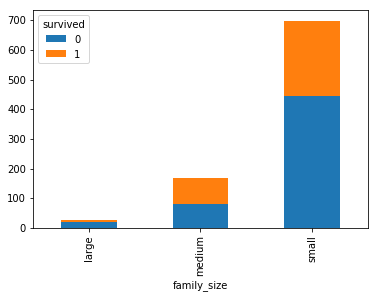

In [365]:
# 가족크기별 생존 비율
data.pivot_table(index='family_size',columns='survived',aggfunc='count')['family_size_count'].plot(kind='bar',stacked=True)

## 결측치 처리 Embarked

In [ ]:
# Emabarked NaN 값을 대체할 수 있는 대표값 찾기


In [381]:
# 1. 대표값 찾기 : 최빈값 => S
data['embarked'].value_counts().index[0]

'S'

In [395]:
data['embarked'].fillna('S',inplace=True)

In [383]:
# 2. 대표값 찾기: title 별 최빈값
data.set_index('title2')['embarked'].sort_index()

title2
master     S
master     S
master     S
master     S
master     S
master     S
master     C
master     S
master     C
master     S
master     S
master     S
master     S
master     S
master     S
master     S
master     C
master     Q
master     S
master     Q
master     S
master     C
master     C
master     S
master     S
master     S
master     S
master     S
master     S
master     S
          ..
mrs        S
mrs        S
mrs        S
mrs        S
mrs        S
mrs        C
mrs        S
officer    S
officer    S
officer    Q
officer    S
officer    S
officer    S
officer    Q
officer    S
officer    S
officer    S
officer    S
officer    S
officer    C
officer    C
officer    S
officer    C
officer    S
officer    C
officer    S
royalty    C
royalty    C
royalty    S
royalty    S
Name: embarked, Length: 891, dtype: object

In [386]:
data['title2'].unique()

array(['mr', 'mrs', 'miss', 'master', 'royalty', 'officer'], dtype=object)

In [ ]:
# exec()  변수명을 이용해서 변수를 만들때
# mr_sr
# miss_sr
# master_sr
# exec(t+"_sr=data[data['title2']==t]['embarked'].value_counts()")

In [390]:
tmp=[]
for t in data['title2'].unique():
    tmp.append(data[data['title2']==t]['embarked'].value_counts().index[0])

In [391]:
tmp

['S', 'S', 'S', 'S', 'S', 'S']

In [398]:
# 객실등급별 출발지 현황 파악
p1=data[data['pclass']==1]['embarked'].value_counts()
p2=data[data['pclass']==2]['embarked'].value_counts()
p3=data[data['pclass']==3]['embarked'].value_counts()

In [396]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'deck', 'title', 'title2',
       'age2', 'age_range', 'family_size', 'family_size_count'],
      dtype='object')

In [402]:
df=pd.DataFrame([p1,p2,p3])
df.head()
df.index=[1,2,3]

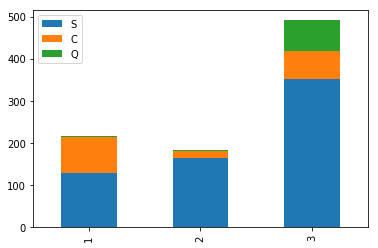

In [403]:
df.plot(kind='bar',stacked=True)

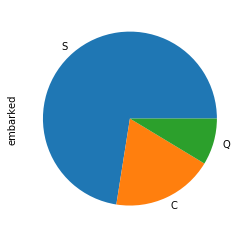

In [401]:
data['embarked'].value_counts().plot(kind='pie')